In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import os

In [ ]:
hr = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/human-resources-analytics/HR_comma_sep.csv")
X, y = hr.drop('left', axis=1), hr['left']


# Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')

# Column Transformer
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object) )],
                             remainder='passthrough',
                             verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

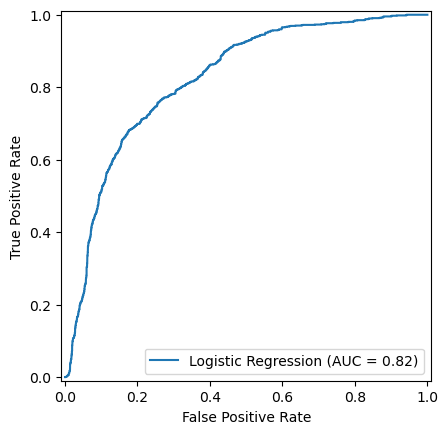

In [ ]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test) #Predict Proba is used for roc curve
fpr, tpr, thres = roc_curve(y_test, y_pred_prob[:,1])

# ROC Curve
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_prob[:,1]) ,
                                  name='Logistic Regression')
disp.plot()
plt.show()

In [ ]:
# Using different solvers - lbfgs, newton-cholesky, sag, saga

solvers = ['lbfgs','newton-cg','newton-cholesky','sag','saga']
penalties = ['l2', None]
scores = []
for s in solvers:
    for p in penalties:
        lr = LogisticRegression(penalty=p ,solver=s)
        lr.fit(X_train, y_train)
        y_pred_prob = lr.predict_proba(X_test)
        scores.append([s, p, roc_auc_score(y_test, y_pred_prob[:,1])])
df_scores = pd.DataFrame(scores, columns=['solver','penalty','score'])

In [8]:
df_scores.sort_values('score', ascending=False)

,solver,penalty,score
2,newton-cg,l2,0.822273
4,newton-cholesky,l2,0.822268
3,newton-cg,None,0.822146
5,newton-cholesky,None,0.822144
1,lbfgs,None,0.817063
0,lbfgs,l2,0.814984
7,sag,None,0.810127
6,sag,l2,0.810098
9,saga,None,0.775538
8,saga,l2,0.775367


In [9]:
from sklearn.metrics import log_loss

In [ ]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
lr.fit(X_train, y_train)

# Calculating Log Loss using output from predict_proba
y_pred_prob = lr.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

0.42760664378823054

In [ ]:
solvers = ['lbfgs','newton-cg','newton-cholesky','sag','saga']
penalties = ['l2', None]
scores = []
for s in solvers:
    for p in penalties:
        lr = LogisticRegression(penalty=p ,solver=s)
        lr.fit(X_train, y_train)
        y_pred_prob = lr.predict_proba(X_test)
        scores.append([s, p, log_loss(y_test, y_pred_prob)])
df_scores = pd.DataFrame(scores, columns=['solver','penalty','score'])

In [12]:
df_scores.sort_values('score', ascending=True)

,solver,penalty,score
3,newton-cg,None,0.427738
5,newton-cholesky,None,0.427740
2,newton-cg,l2,0.427774
4,newton-cholesky,l2,0.427777
1,lbfgs,None,0.429310
0,lbfgs,l2,0.431086
7,sag,None,0.468249
6,sag,l2,0.468273
9,saga,None,0.494468
8,saga,l2,0.494554
